In [1]:
import pandas as pd
import os
import yfinance as yf

In [13]:
Apple = yf.Ticker("XRAY")

In [24]:
close = Apple.history(period = "1y") 

In [25]:
close

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-13 00:00:00-04:00,24.686487,25.739236,24.570589,25.381882,2118600,0.0,0.0
2024-09-16 00:00:00-04:00,25.555726,26.057955,24.850674,25.188713,3622400,0.0,0.0
2024-09-17 00:00:00-04:00,25.352905,26.000008,25.265980,25.777868,1929800,0.0,0.0
2024-09-18 00:00:00-04:00,25.681284,26.540868,25.613677,25.797182,3120600,0.0,0.0
2024-09-19 00:00:00-04:00,26.318729,26.492578,25.797183,25.980690,2968000,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-08 00:00:00-04:00,14.710000,14.720000,14.130000,14.210000,2170800,0.0,0.0
2025-09-09 00:00:00-04:00,14.210000,14.470000,13.900000,13.910000,3156700,0.0,0.0
2025-09-10 00:00:00-04:00,13.890000,14.100000,13.680000,13.700000,2658200,0.0,0.0


In [26]:
close['Close'].sum()

4354.944931030273

In [27]:
len(close)*13.53

3382.5

In [11]:
233.33-234.07

-0.7399999999999807

In [12]:
.73/233.33

0.0031286161230874724

In [30]:
Apple.history(period = "1mo")['Close'].iloc[0]

227.17999267578125

In [40]:
df = Apple.history(period = '10y', auto_adjust = False)

In [32]:
pd.set_option('display.max_rows', None)


In [37]:
new = df[df['Stock Splits'] != 0.0]
new

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2020-08-31 00:00:00-04:00,127.580002,131.0,126.0,129.039993,125.519501,225702700,0.0,4.0


In [41]:
df.loc[df.index < "2020-08-31", 'Close'] *= 4

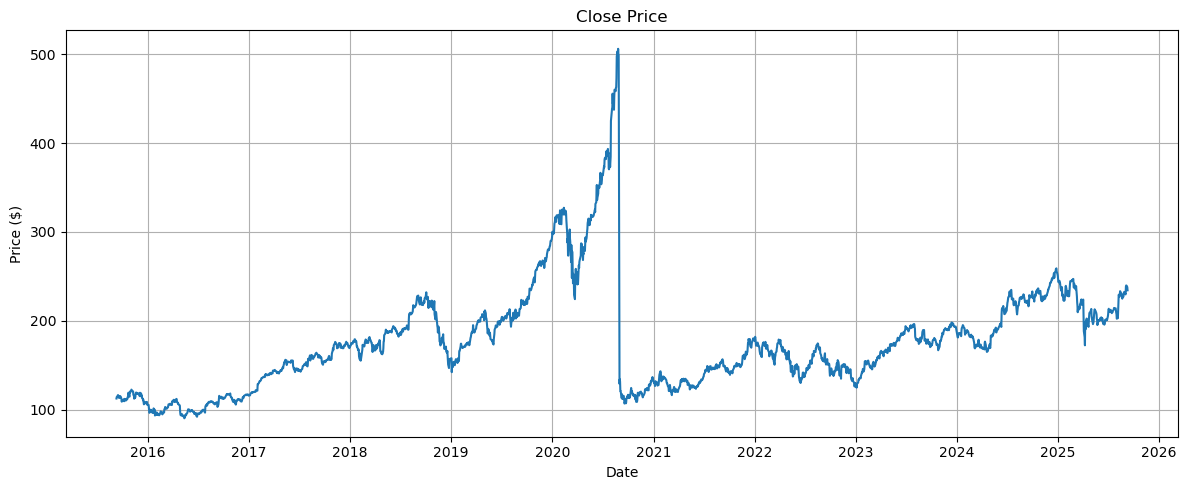

In [43]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

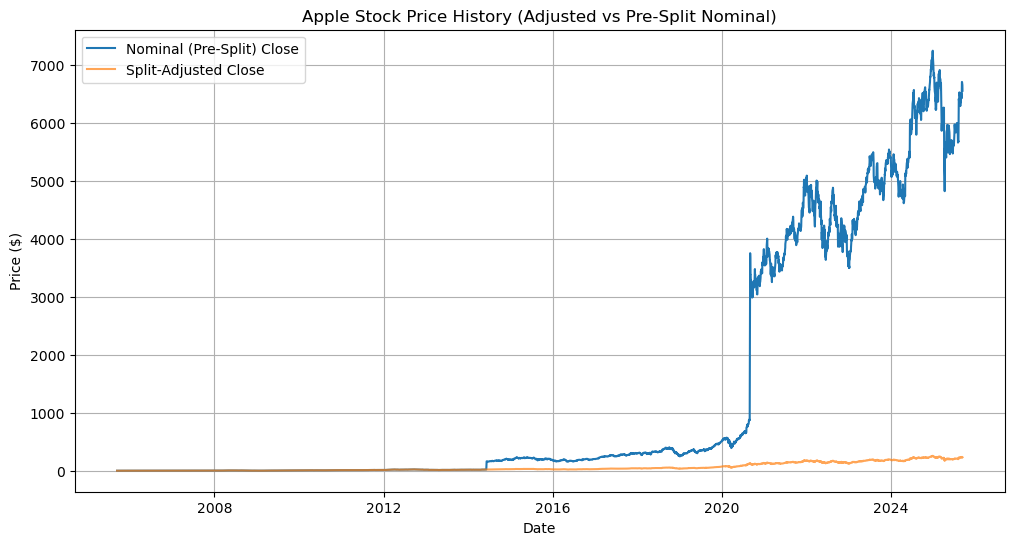

In [27]:
import matplotlib.pyplot as plt

def get_nominal_prices(ticker="AAPL", period="10y"):
    stock = yf.Ticker(ticker)
    
    # Pull raw history (splits & dividends included separately)
    df = stock.history(period=period, auto_adjust=False)

    # Build cumulative split factor (going forward in time)
    df['split_factor'] = (df['Stock Splits'].replace(0, 1)).cumprod()

    # Reconstruct nominal (pre-split) prices
    df['Close_nominal'] = df['Close'] * df['split_factor']

    return df

# Example for Apple
df = get_nominal_prices("AAPL", "20y")

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close_nominal'], label="Nominal (Pre-Split) Close")
plt.plot(df.index, df['Close'], label="Split-Adjusted Close", alpha=0.7)

plt.title("Apple Stock Price History (Adjusted vs Pre-Split Nominal)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
dictionary = Apple.info
attributes = ['trailingPE', 'forwardPE', 'trailingEps', 'forwardEps', 'profitMargins', 'revenuePerShare',\
              'fiftyTwoWeekHighChangePercent', 'fiftyTwoWeekLowChangePercent', 'previousClose', 'quickRatio', 'currentRatio', 'debtToEquity']

In [7]:
nasdaq_tickers = pd.read_csv("https://datahub.io/core/nasdaq-listings/r/nasdaq-listed-symbols.csv")

tickers = nasdaq_tickers['Symbol'].tolist()

In [8]:
attributes = ['averageAnalystRating','previousClose', 'trailingPE', 'forwardPE', 'trailingEps', 'forwardEps', 'profitMargins', 'revenuePerShare',\
              'fiftyTwoWeekHighChangePercent', 'fiftyTwoWeekLowChangePercent',  'quickRatio', 'currentRatio', 'debtToEquity']

In [9]:
cleaned_list = [item for item in tickers if isinstance(item, str) and item.isalpha()]


In [10]:
import random

In [11]:
random.seed(42)

In [12]:
random.shuffle(cleaned_list)

In [13]:
shuffle1 = cleaned_list[0:999]
shuffle2 = cleaned_list[1000:1999]
shuffle3 = cleaned_list[2000:2999]
shuffle4 = cleaned_list[3000:3999]
shuffle5 = cleaned_list[4000:]

df_columns = ['symbol' , 'price_diff_1mo'] #creates a list of the column names
price_diff_df = pd.DataFrame(columns = df_columns)

#the next four for loops create dataframes with a column of the symbol and then the price of closing 1month ago (apr 3, 2025)
for i in shuffle1:
    name = yf.Ticker(i)
    price_diff = {'symbol': i}
    price_diff.update({'price_diff_1mo': name.history(period = '1mo')['Close'].iloc[0]})
    row = pd.DataFrame([price_diff])
    price_diff_df = pd.concat([price_diff_df, row], ignore_index= True)
    

price_diff_df2 = pd.DataFrame(columns = df_columns)
price_diff_df3 = pd.DataFrame(columns = df_columns)
price_diff_df4 = pd.DataFrame(columns = df_columns)
price_diff_df5 = pd.DataFrame(columns = df_columns)


for i in shuffle2:
    name = yf.Ticker(i)
    price_diff = {'symbol': i}
    price_diff.update({'price_diff_1mo': name.history(period = '1mo')['Close'].iloc[0]})
    row = pd.DataFrame([price_diff])
    price_diff_df2 = pd.concat([price_diff_df2, row], ignore_index= True)

import numpy as np

for i in shuffle3:
    name = yf.Ticker(i)
    hist = name.history(period = '1mo')['Close']
    price_diff = {'symbol': i}
    if not hist.empty:
        price_diff.update({'price_diff_1mo': hist.iloc[0]})
    else:
        price_diff.update({'price_diff_1mo': np.nan})
    row = pd.DataFrame([price_diff])
    price_diff_df3 = pd.concat([price_diff_df3, row], ignore_index= True)

price_diff_df3

for i in shuffle4:
    name = yf.Ticker(i)
    hist = name.history(period = '1mo')['Close']
    price_diff = {'symbol': i}
    if not hist.empty:
        price_diff.update({'price_diff_1mo': hist.iloc[0]})
    else:
        price_diff.update({'price_diff_1mo': np.nan})
    row = pd.DataFrame([price_diff])
    price_diff_df4 = pd.concat([price_diff_df4, row], ignore_index= True)

for i in shuffle5:
    name = yf.Ticker(i)
    hist = name.history(period = '1mo')['Close']
    price_diff = {'symbol': i}
    if not hist.empty:
        price_diff.update({'price_diff_1mo': hist.iloc[0]})
    else:
        price_diff.update({'price_diff_1mo': np.nan})
    row = pd.DataFrame([price_diff])
    price_diff_df5 = pd.concat([price_diff_df5, row], ignore_index= True)

prev_price_dfs = [price_diff_df, price_diff_df2, price_diff_df3, price_diff_df4, price_diff_df5]

prev_price_df = pd.concat(prev_price_dfs, ignore_index = True)

prev_price_df = prev_price_df.drop_duplicates()

In [16]:
df = pd.DataFrame(columns=attributes)

In [17]:
for d in shuffle1:
    name = yf.Ticker(d)
    dictionary = name.info
    
    # Extract only the desired attributes and add the ticker as 'symbol'
    filtered_data = {'symbol': d}  # Add the symbol column first
    filtered_data.update({attr: dictionary.get(attr, 'N/A') for attr in attributes})  # Add other attributes
    
    # Create a single-row DataFrame and concatenate it with df
    row = pd.DataFrame([filtered_data])  # Create a single-row DataFrame
    df = pd.concat([df, row], ignore_index=True)

/var/folders/6p/t3wwcl817ws3fsnwb7l5wz6m0000gn/T/ipykernel_2116/1345997532.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, row], ignore_index=True)
HTTP Error 404: 


In [18]:
df.replace('N/A', 0, inplace = True)

/var/folders/6p/t3wwcl817ws3fsnwb7l5wz6m0000gn/T/ipykernel_2116/3312792580.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('N/A', 0, inplace = True)


In [19]:
df

,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,symbol
0,0,24.9000,4.550459,0.000000,5.45,0.00,1.03042,7.357,-0.077381,0.060282,0.518,0.603,32.802,LBRDP
1,0,1.1000,0,-3.645161,-0.78,-0.31,-0.18428,4.241,-0.124031,1.017857,0.655,1.491,0.000,PRPL
2,0,21.2200,35.098415,0.000000,0.00,0.00,0.00000,0.000,-0.012501,0.074954,0.000,0.000,0.000,LOGO
3,0,24.5601,26.865301,0.000000,0.00,0.00,0.00000,0.000,-0.007402,0.313775,0.000,0.000,0.000,DVSP
4,2.0 - Buy,21.1000,24.75,14.142858,0.88,1.54,0.55503,7.319,-0.122835,0.545777,1.582,1.660,176.992,CCEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,12.5500,0,0.000000,0.00,0.00,0.00000,0.000,-0.065116,0.093382,0.000,0.800,0.000,FORLU
995,0,10.3100,0,0.000000,0.00,0.00,0.00000,0.000,-0.070334,0.029970,0.000,0.000,0.000,ATIIU
996,0,7.6100,0,-159.789470,-0.69,0.00,-0.39954,1.742,-0.233178,0.628755,0.362,0.604,0.000,BHST
997,0,2.3999,0,0.000000,-0.12,0.00,-0.06108,1.916,-0.536481,0.174551,0.552,1.819,54.953,MAMO


In [20]:
df2 = pd.DataFrame(columns=attributes)
df3 = pd.DataFrame(columns=attributes)
df4 = pd.DataFrame(columns=attributes)

In [21]:
for d in shuffle2:
    name = yf.Ticker(d)
    dictionary = name.info
    
    # Extract only the desired attributes and add the ticker as 'symbol'
    filtered_data = {'symbol': d}  # Add the symbol column first
    filtered_data.update({attr: dictionary.get(attr, 'N/A') for attr in attributes})  # Add other attributes
    
    # Create a single-row DataFrame and concatenate it with df
    row = pd.DataFrame([filtered_data])  # Create a single-row DataFrame
    df2 = pd.concat([df2, row], ignore_index=True)

/var/folders/6p/t3wwcl817ws3fsnwb7l5wz6m0000gn/T/ipykernel_2116/897575584.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, row], ignore_index=True)


In [22]:
for d in shuffle3:
    name = yf.Ticker(d)
    dictionary = name.info
    
    # Extract only desired attributes, fill with 'N/A' if missing
    filtered_data = {'symbol': d}
    filtered_data.update({attr: dictionary.get(attr, 0) for attr in attributes})
    
    row = pd.DataFrame([filtered_data])  # Create a single-row DataFrame
    df3 = pd.concat([df3, row], ignore_index=True)

/var/folders/6p/t3wwcl817ws3fsnwb7l5wz6m0000gn/T/ipykernel_2116/2659760121.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, row], ignore_index=True)
HTTP Error 404: 


In [24]:
for d in shuffle4:
    name = yf.Ticker(d)
    dictionary = name.info
    
    # Extract only desired attributes, fill with '0' if missing
    filtered_data = {'symbol':d}
    filtered_data.update({attr: dictionary.get(attr, 0) for attr in attributes})
    
    row = pd.DataFrame([filtered_data])  # Create a single-row DataFrame
    df4 = pd.concat([df4, row], ignore_index=True)

In [25]:
df5 = pd.DataFrame(columns=attributes)

In [26]:
for d in shuffle5:
    name = yf.Ticker(d)
    dictionary = name.info

    filtered_data = {'symbol':d}
    filtered_data.update({attr: dictionary.get(attr, 0) for attr in attributes})
    
    row = pd.DataFrame([filtered_data])  # Create a single-row DataFrame
    df5 = pd.concat([df5, row], ignore_index=True)

/var/folders/6p/t3wwcl817ws3fsnwb7l5wz6m0000gn/T/ipykernel_2116/1983742721.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df5 = pd.concat([df5, row], ignore_index=True)
HTTP Error 404: 


In [27]:
df.to_csv('first_sep7.csv')
df2.to_csv('second_sep7.csv')
df3.to_csv('third_sep7.csv')
df4.to_csv('fourth_sep7.csv')
df5.to_csv('fifth_sep7.csv')

df.to_csv('first_may3.csv')
df2.to_csv('second_may3.csv')
df3.to_csv('third_may3.csv')
df4.to_csv('fourth_may3.csv')
df5.to_csv('fifth_may3.csv')


In [41]:
# List of filenames
file_names = ['first_may3.csv', 'second_may3.csv', 'third_may3.csv', 'fourth_may3.csv', 'fifth_may3.csv']

# Read each CSV and store in a list
dfs = [pd.read_csv(file) for file in file_names]

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,Unnamed: 0,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,symbol
0,0,1.5 - Buy,861.9700,91.712036,65.459640,9.55,13.38,0.10492,91.869,-0.118890,0.280220,1.248,1.437,141.235,EQIX
1,1,0,60.3300,30.233545,0.000000,0.00,0.00,0.00000,0.000,-0.094337,0.166867,0.000,0.000,0.000,PABU
2,2,0,28.6000,10.850746,8.478134,2.68,3.43,0.31408,8.984,-0.247022,0.224421,0.000,0.000,0.000,WAFD
3,3,0,3.9800,0.000000,-6.323718,-0.76,0.00,0.00000,0.000,-0.106027,0.820455,10.740,11.096,0.226,EPRX
4,4,0,13.6800,0.000000,-18.653334,-0.75,-0.75,-0.18491,4.032,-0.269833,0.195726,6.553,7.658,22.450,SIBN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,835,0,0.2642,0.000000,-0.095654,-1.40,-2.83,0.00000,0.000,-0.922435,0.230455,2.481,2.583,3.151,CLRB
4832,836,2.8 - Hold,47.8400,47.722775,16.013288,1.01,3.01,0.00560,189.108,-0.332964,0.324176,16.280,20.483,154.737,CRMT
4833,837,0,0.3015,0.000000,0.000000,0.00,0.00,-2.35054,0.258,0.000000,0.000000,4.289,4.516,8.054,OABIW
4834,838,0,3.9400,0.000000,-1.087193,-6.69,-3.67,-0.89632,7.461,-0.567245,0.461538,0.862,1.764,127.959,XOS


In [65]:
combined_df.to_csv('all.csv')

In [66]:
analyst_ratings = combined_df[combined_df['averageAnalystRating'] != '0']
analyst_ratings


,Unnamed: 0,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,symbol
0,0,1.5 - Buy,861.97,91.712036,65.459640,9.55,13.38,0.10492,91.869,-0.118890,0.280220,1.248,1.437,141.235,EQIX
11,11,2.0 - Buy,2.24,0.000000,5.022222,-0.69,0.45,-2.45868,0.248,-0.356309,0.751938,2.600,2.600,350.860,IPHA
17,17,2.3 - Buy,10.68,21.979168,7.128378,0.48,1.48,0.19615,2.436,-0.213860,0.118770,0.821,0.961,46.398,PAX
18,18,1.4 - Strong Buy,3.33,0.000000,-0.654784,-6.62,-5.33,0.00000,0.051,-0.678044,0.321970,5.489,5.734,129.684,ADVM
19,19,2.8 - Hold,47.72,0.000000,8.799655,-13.49,5.79,-0.09561,140.746,-0.526355,0.411748,0.682,0.776,197.322,ALGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,829,2.0 - Buy,6.79,7.072165,8.575000,0.97,0.80,0.29661,3.262,-0.140351,0.170648,0.000,0.000,0.000,LNKB
4827,831,1.6 - Buy,36.01,11.827103,10.288618,3.21,3.69,0.08048,41.610,-0.360859,0.263815,0.654,1.442,52.458,BLBD
4828,832,1.3 - Strong Buy,1.33,0.000000,-0.978723,-1.03,-1.41,0.00000,0.000,-0.687783,0.621622,2.440,2.637,114.853,PDSB
4829,833,2.1 - Buy,5.14,0.000000,-4.801802,-4.55,-1.11,0.00000,0.074,-0.197289,7.737704,1.427,2.769,0.000,EOSE


In [20]:
combined_df = pd.read_csv('all.csv')

In [21]:
combined_df['previousClose'] = combined_df['previousClose'].astype(float)


In [22]:
combined_df.drop(columns = ['Unnamed: 0'])

,Unnamed: 0.1,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,symbol
0,0,1.5 - Buy,861.9700,91.712036,65.459640,9.55,13.38,0.10492,91.869,-0.118890,0.280220,1.248,1.437,141.235,EQIX
1,1,0,60.3300,30.233545,0.000000,0.00,0.00,0.00000,0.000,-0.094337,0.166867,0.000,0.000,0.000,PABU
2,2,0,28.6000,10.850746,8.478134,2.68,3.43,0.31408,8.984,-0.247022,0.224421,0.000,0.000,0.000,WAFD
3,3,0,3.9800,0.000000,-6.323718,-0.76,0.00,0.00000,0.000,-0.106027,0.820455,10.740,11.096,0.226,EPRX
4,4,0,13.6800,0.000000,-18.653334,-0.75,-0.75,-0.18491,4.032,-0.269833,0.195726,6.553,7.658,22.450,SIBN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,4831,0,0.2642,0.000000,-0.095654,-1.40,-2.83,0.00000,0.000,-0.922435,0.230455,2.481,2.583,3.151,CLRB
4832,4832,2.8 - Hold,47.8400,47.722775,16.013288,1.01,3.01,0.00560,189.108,-0.332964,0.324176,16.280,20.483,154.737,CRMT
4833,4833,0,0.3015,0.000000,0.000000,0.00,0.00,-2.35054,0.258,0.000000,0.000000,4.289,4.516,8.054,OABIW
4834,4834,0,3.9400,0.000000,-1.087193,-6.69,-3.67,-0.89632,7.461,-0.567245,0.461538,0.862,1.764,127.959,XOS


In [23]:
combined_df[['previousClose', 'trailingPE', 'forwardPE', 'trailingEps', 'forwardEps', 'profitMargins', 'revenuePerShare',\
              'fiftyTwoWeekHighChangePercent', 'fiftyTwoWeekLowChangePercent',  'quickRatio', 'currentRatio', 'debtToEquity']] = combined_df[['previousClose', 'trailingPE', 'forwardPE', 'trailingEps',\
                                                                                                                                              'forwardEps', 'profitMargins', 'revenuePerShare',\
              'fiftyTwoWeekHighChangePercent', 'fiftyTwoWeekLowChangePercent',  'quickRatio', 'currentRatio', 'debtToEquity']].astype(float)

In [24]:
numerical_df =combined_df.drop(columns = ['averageAnalystRating', 'symbol'])

In [25]:
correlation_matrix = numerical_df.corr()  # Compute correlation matrix
correlation_with_target = correlation_matrix['previousClose'].sort_values(ascending=False)
print(correlation_with_target)

previousClose                    1.000000
fiftyTwoWeekHighChangePercent    0.154622
forwardEps                       0.051007
trailingPE                       0.048146
forwardPE                        0.023165
trailingEps                      0.008923
revenuePerShare                  0.002386
profitMargins                   -0.002070
fiftyTwoWeekLowChangePercent    -0.003441
debtToEquity                    -0.004052
Unnamed: 0                      -0.005739
Unnamed: 0.1                    -0.016332
quickRatio                      -0.032837
currentRatio                    -0.033504
Name: previousClose, dtype: float64


In [26]:
merged = pd.merge(prev_price_df, combined_df, on='symbol', how='left')


In [27]:
merged = merged.drop_duplicates()
merged

,symbol,price_diff_1mo,Unnamed: 0.1,Unnamed: 0,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity
0,VRAX,1.030000,276.0,276.0,0,0.9801,0.000000,-0.534211,-2.61,-1.90,0.00000,0.032,-0.887222,0.653094,10.674,11.576,7.167
1,GSHD,120.870003,314.0,314.0,2.6 - Hold,97.1200,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000
2,EVGN,1.230000,3255.0,258.0,0,1.1500,0.000000,-0.341040,-2.89,-3.46,-1.93691,1.494,-0.868889,0.242105,0.896,1.155,16.869
3,NIPG,1.880000,1379.0,380.0,NaN,1.7100,NaN,NaN,-1.32,NaN,-0.14883,2.429,-0.903153,0.737374,1.037,1.101,6.626
4,IVP,1.640000,2196.0,198.0,0,1.5700,0.000000,0.000000,-6525.00,0.00,-0.85970,74.726,-0.996139,0.230159,0.069,0.247,1047.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,GLE,1.750000,2514.0,516.0,0,1.8500,95.050000,0.000000,0.02,0.00,0.05249,3.091,-0.650551,0.803605,1.410,1.434,0.297
4832,HOTH,0.933000,4375.0,379.0,0,0.8927,0.000000,-1.253099,-1.28,-0.71,0.00000,0.000,-0.765868,0.533965,8.525,9.197,0.452
4833,IPW,0.460000,3551.0,554.0,0,0.5600,inf,9.340000,0.00,0.06,-0.00170,2.633,-0.846466,0.356901,1.158,1.949,43.982
4834,ALRM,52.500000,2912.0,914.0,2.2 - Buy,53.7600,23.786028,24.101770,2.29,2.26,0.13206,18.932,-0.243262,0.129380,7.133,7.847,137.005


In [28]:
merged['price_diff_1mo'] = merged['price_diff_1mo'].round(2)

In [29]:
merged.to_csv("all_pricediff.csv")

In [51]:
merged = pd.read_csv("all_pricediff.csv")

In [52]:
merged = merged.rename(columns = {'price_diff_1mo':'previous_price'})
merged = merged.drop(columns = ['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1'])
merged

,symbol,previous_price,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity
0,VRAX,1.03,0,0.9801,0.000000,-0.534211,-2.61,-1.90,0.00000,0.032,-0.887222,0.653094,10.674,11.576,7.167
1,GSHD,120.87,2.6 - Hold,97.1200,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000
2,EVGN,1.23,0,1.1500,0.000000,-0.341040,-2.89,-3.46,-1.93691,1.494,-0.868889,0.242105,0.896,1.155,16.869
3,NIPG,1.88,NaN,1.7100,NaN,NaN,-1.32,NaN,-0.14883,2.429,-0.903153,0.737374,1.037,1.101,6.626
4,IVP,1.64,0,1.5700,0.000000,0.000000,-6525.00,0.00,-0.85970,74.726,-0.996139,0.230159,0.069,0.247,1047.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,GLE,1.75,0,1.8500,95.050000,0.000000,0.02,0.00,0.05249,3.091,-0.650551,0.803605,1.410,1.434,0.297
4832,HOTH,0.93,0,0.8927,0.000000,-1.253099,-1.28,-0.71,0.00000,0.000,-0.765868,0.533965,8.525,9.197,0.452
4833,IPW,0.46,0,0.5600,inf,9.340000,0.00,0.06,-0.00170,2.633,-0.846466,0.356901,1.158,1.949,43.982
4834,ALRM,52.50,2.2 - Buy,53.7600,23.786028,24.101770,2.29,2.26,0.13206,18.932,-0.243262,0.129380,7.133,7.847,137.005


In [53]:
merged['price_diff_1mo'] = merged['previousClose'] - merged['previous_price']

In [54]:
merged

,symbol,previous_price,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,price_diff_1mo
0,VRAX,1.03,0,0.9801,0.000000,-0.534211,-2.61,-1.90,0.00000,0.032,-0.887222,0.653094,10.674,11.576,7.167,-0.0499
1,GSHD,120.87,2.6 - Hold,97.1200,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000,-23.7500
2,EVGN,1.23,0,1.1500,0.000000,-0.341040,-2.89,-3.46,-1.93691,1.494,-0.868889,0.242105,0.896,1.155,16.869,-0.0800
3,NIPG,1.88,NaN,1.7100,NaN,NaN,-1.32,NaN,-0.14883,2.429,-0.903153,0.737374,1.037,1.101,6.626,-0.1700
4,IVP,1.64,0,1.5700,0.000000,0.000000,-6525.00,0.00,-0.85970,74.726,-0.996139,0.230159,0.069,0.247,1047.930,-0.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,GLE,1.75,0,1.8500,95.050000,0.000000,0.02,0.00,0.05249,3.091,-0.650551,0.803605,1.410,1.434,0.297,0.1000
4832,HOTH,0.93,0,0.8927,0.000000,-1.253099,-1.28,-0.71,0.00000,0.000,-0.765868,0.533965,8.525,9.197,0.452,-0.0373
4833,IPW,0.46,0,0.5600,inf,9.340000,0.00,0.06,-0.00170,2.633,-0.846466,0.356901,1.158,1.949,43.982,0.1000
4834,ALRM,52.50,2.2 - Buy,53.7600,23.786028,24.101770,2.29,2.26,0.13206,18.932,-0.243262,0.129380,7.133,7.847,137.005,1.2600


In [55]:
merged.to_csv('realone.csv')

In [56]:
numerical_df =merged.drop(columns = ['averageAnalystRating', 'symbol'])

In [57]:
correlation_matrix = numerical_df.corr()  # Compute correlation matrix
correlation_with_target = correlation_matrix['price_diff_1mo'].sort_values(ascending=False)
print(correlation_with_target)

price_diff_1mo                   1.000000
previousClose                    0.012047
currentRatio                     0.006179
quickRatio                       0.005975
trailingPE                       0.003511
debtToEquity                     0.001241
forwardEps                       0.000590
forwardPE                        0.000588
revenuePerShare                  0.000578
trailingEps                      0.000574
fiftyTwoWeekLowChangePercent     0.000314
profitMargins                    0.000189
fiftyTwoWeekHighChangePercent   -0.015929
previous_price                  -0.996455
Name: price_diff_1mo, dtype: float64


In [58]:
numerical_df = numerical_df.dropna()

In [59]:
numerical_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (which now includes former infs)
numerical_df.dropna(inplace=True)
numerical_df

,previous_price,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,price_diff_1mo
0,1.03,0.9801,0.000000,-0.534211,-2.61,-1.90,0.00000,0.032,-0.887222,0.653094,10.674,11.576,7.167,-0.0499
1,120.87,97.1200,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000,-23.7500
2,1.23,1.1500,0.000000,-0.341040,-2.89,-3.46,-1.93691,1.494,-0.868889,0.242105,0.896,1.155,16.869,-0.0800
4,1.64,1.5700,0.000000,0.000000,-6525.00,0.00,-0.85970,74.726,-0.996139,0.230159,0.069,0.247,1047.930,-0.0700
5,123.79,124.8800,25.577152,0.000000,0.00,0.00,0.00000,0.000,-0.159195,0.178442,0.000,0.000,0.000,1.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,1.92,1.9300,0.000000,-9.190476,-1.07,-0.21,-0.21095,36.981,-0.234127,0.855769,3.203,3.273,1.110,0.0100
4831,1.75,1.8500,95.050000,0.000000,0.02,0.00,0.05249,3.091,-0.650551,0.803605,1.410,1.434,0.297,0.1000
4832,0.93,0.8927,0.000000,-1.253099,-1.28,-0.71,0.00000,0.000,-0.765868,0.533965,8.525,9.197,0.452,-0.0373
4834,52.50,53.7600,23.786028,24.101770,2.29,2.26,0.13206,18.932,-0.243262,0.129380,7.133,7.847,137.005,1.2600


In [60]:
random_forest_test = numerical_df.drop(columns = ['previous_price', 'previousClose'])

In [61]:
from sklearn.ensemble import RandomForestRegressor

X = random_forest_test.drop('price_diff_1mo', axis=1)
y = random_forest_test['price_diff_1mo']

model = RandomForestRegressor()
model.fit(X, y)

# View feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

currentRatio                     0.318138
fiftyTwoWeekHighChangePercent    0.225951
forwardEps                       0.111311
fiftyTwoWeekLowChangePercent     0.098728
trailingEps                      0.078292
debtToEquity                     0.045441
trailingPE                       0.045012
forwardPE                        0.039235
revenuePerShare                  0.014014
profitMargins                    0.012735
quickRatio                       0.011144
dtype: float64

In [62]:
seed = 42
clf = RandomForestRegressor(max_depth = 3, random_state = 42)


In [63]:
from sklearn.model_selection import train_test_split


In [65]:
train, test = train_test_split(random_forest_test, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)
x_train = train.drop(columns = ['price_diff_1mo'])
y_train = train['price_diff_1mo']

x_val = validate.drop(columns = ['price_diff_1mo'])
y_val = validate['price_diff_1mo']

x_test = test.drop(columns = ['price_diff_1mo'])
y_test = test['price_diff_1mo']

# Prepping data for decision tree

In [66]:
clf.fit(x_train, y_train) #fit model


RandomForestRegressor(max_depth=3, random_state=42)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("RMSE:", mean_squared_error(y_train, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_train, y_pred))
print("R² Score:", r2_score(y_train, y_pred))

RMSE: 8.315775840631664
MAE: 2.629184770977425
R² Score: 0.6246766072636261


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
Q1 = random_forest_test['price_diff_1mo'].quantile(0.10)
Q3 = random_forest_test['price_diff_1mo'].quantile(0.90)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = random_forest_test[(random_forest_test['price_diff_1mo'] < lower_bound) | (random_forest_test['price_diff_1mo'] > upper_bound)]

In [79]:
outliers

,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,price_diff_1mo
1,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000,-23.7500
18,52.026180,33.914677,1.91,2.93,0.12600,15.481,-0.310266,0.440562,1.752,2.767,8.581,18.9800
100,54.685547,30.499998,5.12,9.18,0.18137,28.516,-0.142765,0.433494,0.562,0.676,97.634,16.3400
123,25.447487,4.494355,2.19,12.40,0.28961,8.043,-0.299764,7.278781,2.284,2.438,119.440,19.6900
130,0.000000,0.000000,0.00,0.00,0.00000,0.000,-0.999173,0.136364,0.068,0.126,0.000,-129.3654
...,...,...,...,...,...,...,...,...,...,...,...,...
4614,34.952473,27.536661,5.05,6.41,0.42476,9.842,-0.079623,0.474357,3.297,3.516,0.257,11.2600
4682,24.214760,15.956982,10.57,16.04,0.10735,99.322,-0.401651,0.244106,0.959,1.449,65.113,11.1400
4694,0.000000,172.732600,-8.54,0.00,-0.30976,18.313,-0.080106,0.477226,3.476,3.741,11.372,25.9700
4752,12.206522,7.414766,10.12,16.66,0.15070,67.316,-0.480966,0.122592,0.867,1.440,38.997,-9.7800


In [83]:
merged['gain/lost'] = merged['price_diff_1mo'].apply(lambda x: 'up' if x > 0 else 'down')


In [84]:
merged

,symbol,previous_price,averageAnalystRating,previousClose,trailingPE,forwardPE,trailingEps,forwardEps,profitMargins,revenuePerShare,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLowChangePercent,quickRatio,currentRatio,debtToEquity,price_diff_1mo,gain/lost
0,VRAX,1.03,0,0.9801,0.000000,-0.534211,-2.61,-1.90,0.00000,0.032,-0.887222,0.653094,10.674,11.576,7.167,-0.0499,down
1,GSHD,120.87,2.6 - Hold,97.1200,85.316660,48.065723,1.20,2.13,0.09531,13.211,-0.214817,0.868248,2.188,2.789,0.000,-23.7500,down
2,EVGN,1.23,0,1.1500,0.000000,-0.341040,-2.89,-3.46,-1.93691,1.494,-0.868889,0.242105,0.896,1.155,16.869,-0.0800,down
3,NIPG,1.88,NaN,1.7100,NaN,NaN,-1.32,NaN,-0.14883,2.429,-0.903153,0.737374,1.037,1.101,6.626,-0.1700,down
4,IVP,1.64,0,1.5700,0.000000,0.000000,-6525.00,0.00,-0.85970,74.726,-0.996139,0.230159,0.069,0.247,1047.930,-0.0700,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,GLE,1.75,0,1.8500,95.050000,0.000000,0.02,0.00,0.05249,3.091,-0.650551,0.803605,1.410,1.434,0.297,0.1000,up
4832,HOTH,0.93,0,0.8927,0.000000,-1.253099,-1.28,-0.71,0.00000,0.000,-0.765868,0.533965,8.525,9.197,0.452,-0.0373,down
4833,IPW,0.46,0,0.5600,inf,9.340000,0.00,0.06,-0.00170,2.633,-0.846466,0.356901,1.158,1.949,43.982,0.1000,up
4834,ALRM,52.50,2.2 - Buy,53.7600,23.786028,24.101770,2.29,2.26,0.13206,18.932,-0.243262,0.129380,7.133,7.847,137.005,1.2600,up


In [87]:
len(merged[merged['gain/lost'] == 'up'])

2996

In [88]:
from sklearn.ensemble import RandomForestClassifier


In [93]:
random_forest_class=  random_forest_test

In [94]:
random_forest_class['gain/lost'] = random_forest_class['price_diff_1mo'].apply(lambda x: 'up' if x > 0 else 'down')


In [102]:
random_forest_class = random_forest_class.drop(columns = ['price_diff_1mo'])

In [103]:
train, test = train_test_split(random_forest_class, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)
x_train = train.drop(columns = ['gain/lost'])
y_train = train['gain/lost']

x_val = validate.drop(columns = ['gain/lost'])
y_val = validate['gain/lost']

x_test = test.drop(columns = ['gain/lost'])
y_test = test['gain/lost']

In [104]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(x_train, y_train)
RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)
y_pred = rf.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        down       0.71      0.44      0.54       826
          up       0.73      0.90      0.80      1407

    accuracy                           0.73      2233
   macro avg       0.72      0.67      0.67      2233
weighted avg       0.72      0.73      0.71      2233



x_train = random_forest_class.drop(columns = ['gain/lost'])
y_train = random_forest_class['gain/lost']

In [107]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(x_train, y_train)
RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)
y_pred = rf.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        down       0.80      0.34      0.48      1508
          up       0.70      0.95      0.81      2481

    accuracy                           0.72      3989
   macro avg       0.75      0.64      0.64      3989
weighted avg       0.74      0.72      0.68      3989



In [108]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [109]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

fiftyTwoWeekLowChangePercent     0.257639
fiftyTwoWeekHighChangePercent    0.164138
currentRatio                     0.080623
quickRatio                       0.075698
revenuePerShare                  0.072453
trailingEps                      0.064787
debtToEquity                     0.063869
trailingPE                       0.062452
forwardPE                        0.055935
profitMargins                    0.055754
forwardEps                       0.046652
dtype: float64

In [ ]:
import shap

# Create the SHAP explainer for your trained model
explainer = shap.TreeExplainer(model)  

# Calculate SHAP values for the validation or test set
shap_values = explainer.shap_values(x_train)

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")


<Figure size 640x480 with 0 Axes>

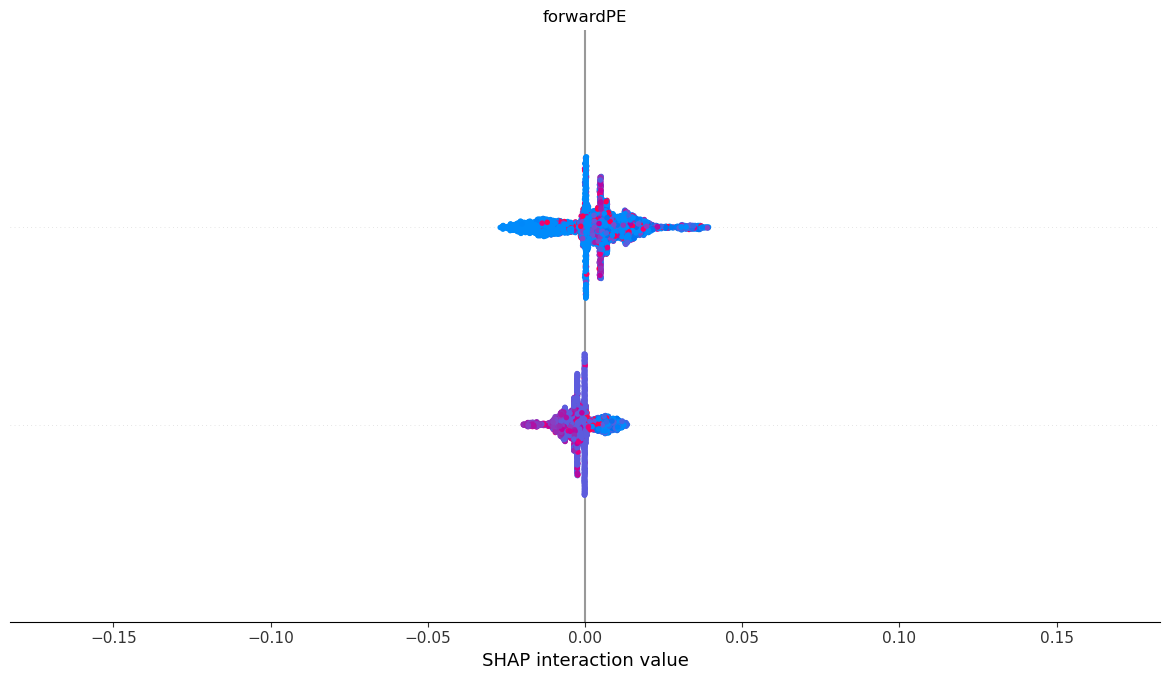

In [112]:
shap.summary_plot(shap_values, x_train)
